In [33]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm, trange
from tqdm.contrib import tenumerate
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import seaborn as sns
import pandas as pd
import time
import itertools
import scipy.stats as stats
import jpype
import datasets as datasets



In [34]:
import matplotlib as mpl
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42
# mpl.use('svg')
new_rc_params = {
    "font.family": 'Times', #probably python doesn't know Times, but it will replace it with a different font anyway. The final decision is up to the latex document anyway
    "font.size": 12, #choosing the font size helps latex to place all the labels, ticks etc. in the right place
    "font.serif": [],
    "svg.fonttype": 'none'} #to store text as text, not as path
mpl.rcParams.update(new_rc_params)


In [35]:
filenames = ['logistic_varying_length.npz', 'logistic_varying_noise.npz', 'tent_varying_length.npz', 'tent_varying_noise.npz']
datas = []
for filename in filenames:
    datas.append(np.load(filename, allow_pickle=True))


In [36]:
x_start = 0.1
series_length = 3200
logistic_num = tent_a_num = 100

param_range_tent = np.linspace(1.001, 1.999, tent_a_num)
param_range_logistic = np.linspace(3.57, 4, logistic_num)


logistic_full_data = np.array([
    np.fromiter(datasets.logistic_map(x_start, series_length, r), dtype="float32")
    for r in param_range_logistic
])

param_range_tent = np.linspace(1.001, 1.999, tent_a_num)
param_range_logistic = np.linspace(3.57, 4, logistic_num)

tentLambdas = np.log(param_range_tent, where=param_range_tent > 0)
logisticLambdas =np.array([
      np.mean(np.log(abs(r - 2 * r * x[np.where(x != 0.5)])))
      for x, r in zip(logistic_full_data, param_range_logistic)
    ])

# np.savez('logistic_varyinglength_variables.npz',  
#          l_AMIdistance_length_result = l_AMIdistance_length_result,
#          l_AMIdistance_LE_correlation_length = l_AMIdistance_LE_correlation_length, 
#          l_AMIdistance_time_length = l_AMIdistance_time_length,
#          l_lambda_e_length_result = l_lambda_e_length_result,  
#          l_lambda_e_correlation_length = l_lambda_e_correlation_length,  
#          l_lambda_e_time_length = l_lambda_e_time_length,  
#          l_varying_length = l_varying_length,
#          l_varying_length_prameter = l_varying_length_prameter)



dataIdx = 0
varnames = datas[dataIdx].files

conVarIdx = 6
resultAMIVarIdx = 0
corrAMIVarIdx = 1
timeAMIVarIdx = 2
resultLambdaEVarIdx = 3
corrLambdaEVarIdx = 4
timeLambdaEVarIdx = 5

# controled variable
conVarL = varnames[conVarIdx]

conL = datas[dataIdx][conVarL]
# AMI distance result
resultAMIVarL = varnames[resultAMIVarIdx]
corrAMIVarL = varnames[corrAMIVarIdx]
timeAMIVarL = varnames[timeAMIVarIdx]

resultAMIL = datas[dataIdx][resultAMIVarL]
corrAMIL = datas[dataIdx][corrAMIVarL]
timeAMIL = datas[dataIdx][timeAMIVarL]
# Eckmann's lambda_e result
resultLambdaEVarL = varnames[resultLambdaEVarIdx]
corrLambdaEVarL = varnames[corrLambdaEVarIdx]
timeLambdaEVarL = varnames[timeLambdaEVarIdx]

resultLambdaEL = datas[dataIdx][resultLambdaEVarL]
corrLambdaEL = datas[dataIdx][corrLambdaEVarL]
timeLambdaEL = datas[dataIdx][timeLambdaEVarL]



dataIdx = 2
varnames = datas[dataIdx].files

# controled variable
conVarT = varnames[conVarIdx]

conT = datas[dataIdx][conVarT]
# AMI distance result
resultAMIVarT = varnames[resultAMIVarIdx]
corrAMIVarT = varnames[corrAMIVarIdx]
timeAMIVarT = varnames[timeAMIVarIdx]

resultAMIT = datas[dataIdx][resultAMIVarT]
corrAMIT = datas[dataIdx][corrAMIVarT]
timeAMIT = datas[dataIdx][timeAMIVarT]

# Eckmann's lambda_e result
resultLambdaEVarT = varnames[resultLambdaEVarIdx]
corrLambdaeVarT = varnames[corrLambdaEVarIdx]
timeLambdaeVarT = varnames[timeLambdaEVarIdx]

resultLambdaET = datas[dataIdx][resultLambdaEVarT]
corrLambdaET = datas[dataIdx][corrLambdaeVarT]
timeLambdaET = datas[dataIdx][timeLambdaeVarT]





con = conL
resultAMIL = np.abs(resultAMIL)
resultAMIT = np.abs(resultAMIT)


# remove points in logisticLambdas that are smaller than 0
invalidLIdx = np.where(logisticLambdas < 0)
logisticLambdas = np.delete(logisticLambdas, invalidLIdx)
resultAMIL = np.delete(resultAMIL, invalidLIdx, axis=1)
resultLambdaEL = np.delete(resultLambdaEL, invalidLIdx, axis=1)


print(logisticLambdas.shape)
print(resultAMIL.shape)

corrAMIL = np.array([
    np.corrcoef(logisticLambdas, resultAMIL[i])[0, 1]
    for i in range(len(con))
    ])

corrLambdaEL = np.array([
    np.corrcoef(logisticLambdas, resultLambdaEL[i])[0, 1]
    for i in range(len(con))
    ])

(91,)
(10, 91)


In [37]:
print(conL)
print(conT)

[  50  100  200  400  800 1000 1200 1600 2000 2500]
[  50  100  200  400  800 1000 1200 1600 2000 2500]


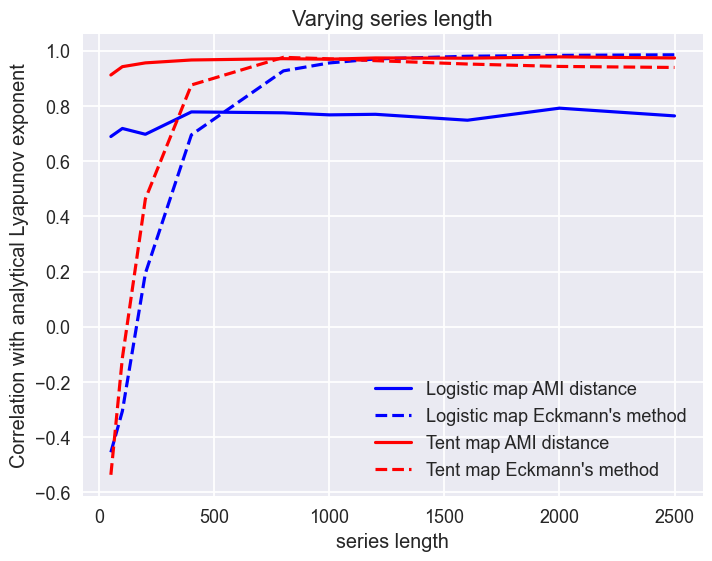

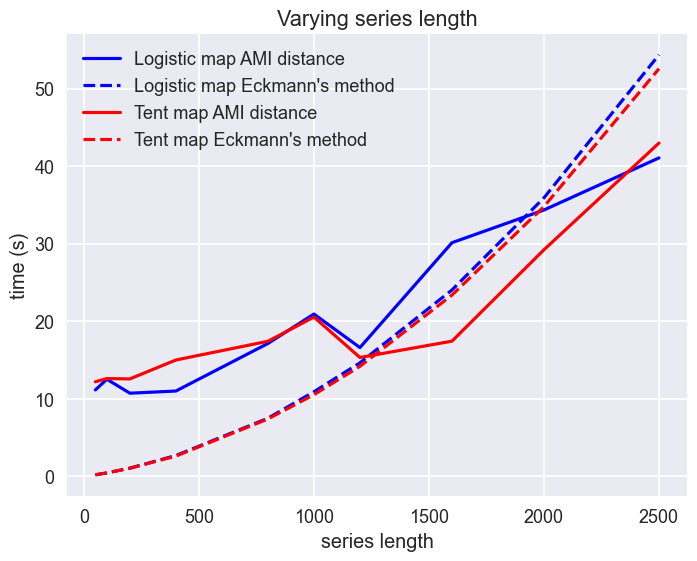

In [38]:
#plot all
# AMI distance
# pickedidx = range(len(con))
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultAMIL[i], marker='.',alpha=0.5)
#     plt.xlabel("Ground true LE")
#     plt.ylabel("AMI distance")
#     plt.title("length = {}, correlation = {:.3f}".format(l, corrAMIL[i]))
# plt.suptitle("For logistic map")
# plt.show()


# # Eckmann's lambda_e
# pickedidx = range(len(con))
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultLambdaEL[i], marker='.',alpha=0.5)
#     plt.xlabel("ground true LE")
#     plt.ylabel("Eckmann's lambda_e")
#     plt.title("length = {}, correlation = {:.3f}".format(l, corrLambdaEL[i]))
# plt.suptitle("For logistic map")
# plt.show()


# # AMI distance
# pickedidx = [0, 4, 8]
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.99, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultAMIL[i], marker='.',alpha=0.5)
#     plt.xlabel("Ground true LE")
#     plt.ylabel("AMI distance")
#     plt.title("length = {}, correlation = {:.3f}".format(l, corrAMIL[i]))
# plt.suptitle("For logistic map")
# plt.show()


# # Eckmann's lambda_e
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.99, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultLambdaEL[i], marker='.',alpha=0.5)
#     plt.xlabel("ground true LE")
#     plt.ylabel("Eckmann's lambda_e")
#     plt.title("length = {}, correlation = {:.3f}".format(l, corrLambdaEL[i]))
# plt.suptitle("For logistic map")
# plt.show()

plt.style.use('seaborn')
plt.style.use('seaborn-talk')

# plt.figure()
# plt.plot(con, corrAMIL, label="AMI distance")
# plt.plot(con, corrLambdaEL, label="Eckmann's method")
# plt.xlabel("series length")
# plt.ylabel("Correlation")
# plt.title("Logistic map varying length")
# plt.legend()
# plt.show()


# plt.figure()
# plt.plot(con, timeAMIL, label="AMI distance")
# plt.plot(con, timeLambdaEL, label="Eckmann's method")
# plt.xlabel("length")
# plt.ylabel("time (s)")
# plt.title("Logistic map varying length")
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(con, corrAMIT, label="AMI distance")
# plt.plot(con, corrLambdaET, label="Eckmann's method")
# plt.xlabel("series length")
# plt.ylabel("Correlation")
# plt.title("Logistic map varying length")
# plt.legend()
# plt.show()


# plt.figure()
# plt.plot(con, timeAMIT, label="AMI distance")
# plt.plot(con, timeLambdaET, label="Eckmann's method")
# plt.xlabel("length")
# plt.ylabel("time (s)")
# plt.title("Logistic map varying length")
# plt.legend()
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(con, corrAMIL, label="Logistic map AMI distance", color = 'blue')
plt.plot(con, corrLambdaEL, label="Logistic map Eckmann's method", color = 'blue', linestyle='dashed')
plt.plot(con, corrAMIT, label="Tent map AMI distance", color = 'red')
plt.plot(con, corrLambdaET, label="Tent map Eckmann's method", color = 'red', linestyle='dashed')

plt.legend()
plt.xlabel("series length")
plt.ylabel("Correlation with analytical Lyapunov exponent")
plt.title("Varying series length")
plt.savefig('benchmark_varying_length.pdf', format='pdf', dpi=1200)
# plt.savefig('benchmark_varying_length.eps', format='eps', dpi=1200)
plt.savefig ('benchmark_varying_length.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(con, timeAMIL, label="Logistic map AMI distance", color = 'blue')
plt.plot(con, timeLambdaEL, label="Logistic map Eckmann's method", color = 'blue', linestyle='dashed')
plt.plot(con, timeAMIT, label="Tent map AMI distance", color = 'red')
plt.plot(con, timeLambdaET, label="Tent map Eckmann's method", color = 'red', linestyle='dashed')
# plt.savefig('benchmark_varying_length_time.eps', format='eps', dpi=1200)
plt.legend()
plt.xlabel("series length")
plt.ylabel("time (s)")
plt.title("Varying series length")
plt.savefig('benchmark_varying_length_time.pdf', format='pdf', dpi=1200)
plt.savefig ('benchmark_varying_length_time.svg', format='svg', dpi=1200)
plt.show()


In [39]:
x_start = 0.1
series_length = 1200
logistic_num = tent_a_num = 100

param_range_tent = np.linspace(1.001, 1.999, tent_a_num)
param_range_logistic = np.linspace(3.57, 4, logistic_num)


logistic_full_data = np.array([
    np.fromiter(datasets.logistic_map(x_start, series_length, r), dtype="float32")
    for r in param_range_logistic
])

param_range_tent = np.linspace(1.001, 1.999, tent_a_num)
param_range_logistic = np.linspace(3.57, 4, logistic_num)

tentLambdas = np.log(param_range_tent, where=param_range_tent > 0)
logisticLambdas =np.array([
      np.mean(np.log(abs(r - 2 * r * x[np.where(x != 0.5)])))
      for x, r in zip(logistic_full_data, param_range_logistic)
    ])


dataIdx = 1
varnames = datas[dataIdx].files

conVarIdx = 6
resultAMIVarIdx = 0
corrAMIVarIdx = 1
timeAMIVarIdx = 2
resultLambdaEVarIdx = 3
corrLambdaEVarIdx = 4
timeLambdaEVarIdx = 5

# controled variable
conVarL = varnames[conVarIdx]

conL = datas[dataIdx][conVarL]
# AMI distance result
resultAMIVarL = varnames[resultAMIVarIdx]
corrAMIVarL = varnames[corrAMIVarIdx]
timeAMIVarL = varnames[timeAMIVarIdx]

resultAMIL = datas[dataIdx][resultAMIVarL]
corrAMIL = datas[dataIdx][corrAMIVarL]
timeAMIL = datas[dataIdx][timeAMIVarL]
# Eckmann's lambda_e result
resultLambdaEVarL = varnames[resultLambdaEVarIdx]
corrLambdaEVarL = varnames[corrLambdaEVarIdx]
timeLambdaEVarL = varnames[timeLambdaEVarIdx]

resultLambdaEL = datas[dataIdx][resultLambdaEVarL]
corrLambdaEL = datas[dataIdx][corrLambdaEVarL]
timeLambdaEL = datas[dataIdx][timeLambdaEVarL]



dataIdx = 3
varnames = datas[dataIdx].files

# controled variable
conVarT = varnames[conVarIdx]

conT = datas[dataIdx][conVarT]
# AMI distance result
resultAMIVarT = varnames[resultAMIVarIdx]
corrAMIVarT = varnames[corrAMIVarIdx]
timeAMIVarT = varnames[timeAMIVarIdx]

resultAMIT = datas[dataIdx][resultAMIVarT]
corrAMIT = datas[dataIdx][corrAMIVarT]
timeAMIT = datas[dataIdx][timeAMIVarT]

# Eckmann's lambda_e result
resultLambdaEVarT = varnames[resultLambdaEVarIdx]
corrLambdaeVarT = varnames[corrLambdaEVarIdx]
timeLambdaeVarT = varnames[timeLambdaEVarIdx]

resultLambdaET = datas[dataIdx][resultLambdaEVarT]
corrLambdaET = datas[dataIdx][corrLambdaeVarT]
timeLambdaET = datas[dataIdx][timeLambdaeVarT]





con = conL
resultAMIL = np.abs(resultAMIL)
resultAMIT = np.abs(resultAMIT)


# remove points in logisticLambdas that are smaller than 0
invalidLIdx = np.where(logisticLambdas < 0)
logisticLambdas = np.delete(logisticLambdas, invalidLIdx)
resultAMIL = np.delete(resultAMIL, invalidLIdx, axis=1)
resultLambdaEL = np.delete(resultLambdaEL, invalidLIdx, axis=1)


print(logisticLambdas.shape)
print(resultAMIL.shape)

corrAMIL = np.array([
    np.corrcoef(logisticLambdas, resultAMIL[i])[0, 1]
    for i in range(len(con))
    ])

corrLambdaEL = np.array([
    np.corrcoef(logisticLambdas, resultLambdaEL[i])[0, 1]
    for i in range(len(con))
    ])

(91,)
(11, 91)


In [40]:
con

array([60, 50, 40, 35, 30, 25, 20, 15, 10,  5,  1], dtype=int64)

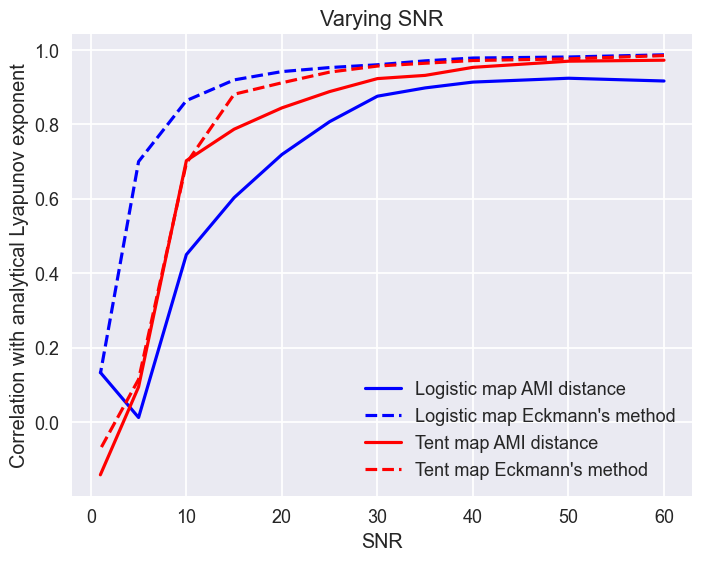

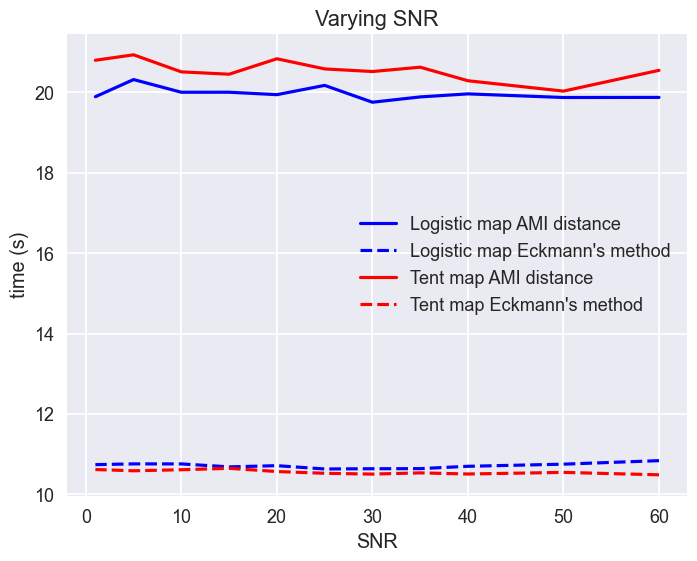

In [41]:
#plot all
# AMI distance
# pickedidx = range(len(con))
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultAMIL[i], marker='.',alpha=0.5)
#     plt.xlabel("Ground true LE")
#     plt.ylabel("AMI distance")
#     plt.title("SNR = {}, correlation = {:.3f}".format(l, corrAMIL[i]))
# plt.suptitle("For logistic map")
# plt.show()


# # Eckmann's lambda_e
# pickedidx = range(len(con))
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultLambdaEL[i], marker='.',alpha=0.5)
#     plt.xlabel("ground true LE")
#     plt.ylabel("Eckmann's lambda_e")
#     plt.title("SNR = {}, correlation = {:.3f}".format(l, corrLambdaEL[i]))
# plt.suptitle("For logistic map")
# plt.show()


# # AMI distance
# pickedidx = [0, 4, 8]
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.99, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultAMIL[i], marker='.',alpha=0.5)
#     plt.xlabel("Ground true LE")
#     plt.ylabel("AMI distance")
#     plt.title("SNR = {}, correlation = {:.3f}".format(l, corrAMIL[i]))
# plt.suptitle("For logistic map")
# plt.show()


# # Eckmann's lambda_e
# plt.figure(figsize=(20, 20))
# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.99, wspace=0.3, hspace=0.3)
# for idx, i in enumerate(pickedidx):
#     l = con[i]
#     plt.subplot(4,3, idx+1)
#     plt.scatter(logisticLambdas, resultLambdaEL[i], marker='.',alpha=0.5)
#     plt.xlabel("ground true LE")
#     plt.ylabel("Eckmann's lambda_e")
#     plt.title("SNR = {}, correlation = {:.3f}".format(l, corrLambdaEL[i]))
# plt.suptitle("For logistic map")
# plt.show()


# plt.figure()
# plt.plot(con, corrAMIL, label="AMI distance")
# plt.plot(con, corrLambdaEL, label="Eckmann's method")
# plt.xlabel("SNR")
# plt.ylabel("correlation")
# plt.title("Correlation for different SNR")
# plt.legend()
# plt.show()


# plt.figure()
# plt.plot(con, timeAMIL, label="AMI distance")
# plt.plot(con, timeLambdaEL, label="Eckmann's method")
# plt.xlabel("SNR")
# plt.ylabel("time (s)")
# plt.title("Time to compute for different SNR")
# plt.legend()
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(con, corrAMIL, label="Logistic map AMI distance", color = 'blue')
plt.plot(con, corrLambdaEL, label="Logistic map Eckmann's method", color = 'blue', linestyle='dashed')
plt.plot(con, corrAMIT, label="Tent map AMI distance", color = 'red')
plt.plot(con, corrLambdaET, label="Tent map Eckmann's method", color = 'red', linestyle='dashed')

plt.legend()
plt.xlabel("SNR")
plt.ylabel("Correlation with analytical Lyapunov exponent")
plt.title("Varying SNR")
plt.savefig('benchmark_varying_noise.pdf', format='pdf', dpi=1200)
# plt.savefig('benchmark_varying_noise.eps', format='eps', dpi=1200)
plt.savefig ('benchmark_varying_noise.svg', format='svg', dpi=1200)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(con, timeAMIL, label="Logistic map AMI distance", color = 'blue')
plt.plot(con, timeLambdaEL, label="Logistic map Eckmann's method", color = 'blue', linestyle='dashed')
plt.plot(con, timeAMIT, label="Tent map AMI distance", color = 'red')
plt.plot(con, timeLambdaET, label="Tent map Eckmann's method", color = 'red', linestyle='dashed')
# plt.savefig('benchmark_varying_length_time.eps', format='eps', dpi=1200)
plt.legend()
plt.xlabel("SNR")
plt.ylabel("time (s)")
plt.title("Varying SNR")
plt.savefig('benchmark_varying_noise_time.pdf', format='pdf', dpi=1200)
plt.savefig ('benchmark_varying_noise_time.svg', format='svg', dpi=1200)
plt.show()



